In [1]:
import os
import os.path as op
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid", color_codes=True)
sns.set(font_scale=1.35, style="ticks") #set styling preferences
import statsmodels.api as sm
from scipy import stats
import math
from math import pi
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from scipy.spatial.distance import cdist
from scipy.cluster.vq import kmeans2,vq, whiten

In [2]:
# Show all columns and rows
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
%%time
BaselinePath2018 = "https://beam-core-act.s3.amazonaws.com/deepDive/CleanData/SanFrancisco/Baseline/"
sf_baseline_2018 = pd.read_csv(BaselinePath2018 + 'sf_2018_base_utilities.csv')

<timed exec>:2: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: total: 1min 16s
Wall time: 3min 27s


In [4]:
#sf_base_pivot = pd.pivot_table(
#   sf_baseline_2018,
#   index=["mode_choice_actual_BEAM"],
#   aggfunc={'waitTime': np.mean
#           }).reset_index()

In [5]:
#sf_baseline_2018[(sf_baseline_2018['mode_choice_actual_BEAM'] == 'ride_hail') |(sf_baseline_2018['mode_choice_actual_BEAM'] == 'ride_hail_pooled')]['waitTime'].mean()

In [6]:
#sf_baseline_2018[(sf_baseline_2018['mode_choice_actual_BEAM'] == 'ride_hail') |(sf_baseline_2018['mode_choice_actual_BEAM'] == 'ride_hail_pooled')]['waitTime'].std()

In [7]:
#sf_baseline_2018[(sf_baseline_2018['mode_choice_actual_BEAM'] == 'drive_transit')|(sf_baseline_2018['mode_choice_actual_BEAM'] == 'walk_transit')|
                #(sf_baseline_2018['mode_choice_actual_BEAM'] == 'bike_transit')]['waitTime'].mean()

In [8]:
#sf_baseline_2018[(sf_baseline_2018['mode_choice_actual_BEAM'] == 'drive_transit')|(sf_baseline_2018['mode_choice_actual_BEAM'] == 'walk_transit')|
                #(sf_baseline_2018['mode_choice_actual_BEAM'] == 'bike_transit')]['waitTime'].std()

In [ ]:
#%%time
#rh_flsz_path = "https://beam-core-act.s3.amazonaws.com/deepDive/CleanData/SanFrancisco/RideHail_FleetSize/"
#sf_rh_flsz_0125 = pd.read_csv(rh_flsz_path + 'sf_2018_rh_flsz_0p125.csv')

In [4]:
%%time
rh_flsz_path = "https://beam-core-act.s3.amazonaws.com/deepDive/CleanData/SanFrancisco/RideHail_FleetSize/"
sf_rh_flsz_025 = pd.read_csv(rh_flsz_path + 'sf_2018_rh_flsz_0p25.csv')

CPU times: total: 1min 1s
Wall time: 1min 37s


In [5]:
#%%time
#sf_rh_flsz_05 = pd.read_csv(rh_flsz_path + 'sf_2018_rh_flsz_0p5.csv')

In [6]:
#%%time
#sf_rh_flsz_150 = pd.read_csv(rh_flsz_path + 'sf_2018_rh_flsz_1p5.csv')

In [5]:
%%time
sf_rh_flsz_175 = pd.read_csv(rh_flsz_path + 'sf_2018_rh_flsz_1p75_utilities.csv')

<timed exec>:1: DtypeWarning: Columns (40,61,84,88,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,139,148,153,155,156,157,158,160,161,218,219,220,221,230) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: total: 1min 16s
Wall time: 2min 3s


In [3]:
#%%time
stacked_tr_fr_path = "https://beam-core-act.s3.amazonaws.com/deepDive/CleanData/SanFrancisco/Stacked/"
sf_stacked_rh_flsz = pd.read_csv(stacked_tr_fr_path + 'sf_2018_stacked_rh_flsz.csv')

In [ ]:
#%%time
stacked_tr_fr_path = "https://beam-core-act.s3.amazonaws.com/deepDive/CleanData/SanFrancisco/Stacked/"
sf_stacked_tr_fr = pd.read_csv(stacked_tr_fr_path + 'sf_2018_stacked_tr_fr_v4.csv')

In [9]:
#sf_stacked_tr_fr.head(2000).to_csv('C:/Shared-Work/Data/CleanData/ASIM_BEAM_Merged/INEXUS_TEST.csv', index = False)

In [10]:
#sf_stacked_tr_fr['Realized_INEXUS_in_dollar'] = sf_stacked_tr_fr['Realized_INEXUS']/sf_stacked_tr_fr['alpha']

In [11]:
#sf_stacked_tr_fr['Potential_INEXUS_in_dollar'] = sf_stacked_tr_fr['logsum_trip_Potential_INEXUS']/sf_stacked_tr_fr['alpha']

In [10]:
#sf_stacked_tr_fr = sf_stacked_tr_fr[(sf_stacked_tr_fr['Realized_INEXUS_in_dollar'] > -33)&(sf_stacked_tr_fr['Potential_INEXUS_in_dollar'] > -33)]

In [11]:
#sf_stacked_tr_fr = sf_stacked_tr_fr[(sf_stacked_tr_fr['Realized_INEXUS_in_dollar'] < 13.4)&(sf_stacked_tr_fr['Potential_INEXUS_in_dollar'] < 13.4)]

In [12]:
#mand = sf_stacked_tr_fr[(sf_stacked_tr_fr['mandatoryCat'] == 'from_H_to_M')|(sf_stacked_tr_fr['mandatoryCat'] == 'from_M_to_H')|
                        #(sf_stacked_tr_fr['mandatoryCat'] == 'from_M_to_M')]

#### Consumer Surplus

In [14]:
#sf_stacked_tr_fr['sum_potential'] = sf_stacked_tr_fr.groupby(["lever_position"])["Potential_INEXUS_in_dollar"].transform('sum')

In [17]:
#sf_stacked_tr_fr['sum_realized'] = sf_stacked_tr_fr.groupby(["lever_position"])["Realized_INEXUS_in_dollar"].transform('sum')

In [16]:
#(sf_stacked_tr_fr[sf_stacked_tr_fr["lever_position"] == 0.5]["Potential_INEXUS_in_dollar"].sum())

#### Removing NANs

In [6]:
sf_rh_flsz_025 = sf_rh_flsz_025[sf_rh_flsz_025['logsum_trip_mode_AS_trips'].notna()]

In [7]:
sf_baseline_2018 = sf_baseline_2018[sf_baseline_2018['logsum_trip_mode_AS_trips'].notna()]

In [8]:
sf_rh_flsz_175 = sf_rh_flsz_175[sf_rh_flsz_175['logsum_trip_mode_AS_trips'].notna()]

In [35]:
#sf_rh_flsz_0125 = sf_rh_flsz_0125[sf_rh_flsz_0125['logsum_trip_mode_AS_trips'].notna()]

In [36]:
#sf_rh_flsz_05 = sf_rh_flsz_05[sf_rh_flsz_05['logsum_trip_mode_AS_trips'].notna()]

In [37]:
#sf_rh_flsz_150 = sf_rh_flsz_150[sf_rh_flsz_150['logsum_trip_mode_AS_trips'].notna()]

In [9]:
sf_baseline_2018.income.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

0.1      24340.0
0.2      41000.0
0.3      57600.0
0.4      74500.0
0.5      93350.0
0.6     114000.0
0.7     140000.0
0.8     174700.0
0.9     240200.0
1.0    1354000.0
Name: income, dtype: float64

In [10]:
# determine the quartile values to use with pd.cut
deciles = sf_baseline_2018['income'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]).tolist()

In [11]:
# add a lower and upper range for the bins in pd.cut
deciles = [0] + deciles + [float('inf')]

In [12]:
# add a quartiles column to groups, using pd.cut
sf_baseline_2018['income_deciles'] = pd.cut(sf_baseline_2018['income'], bins=deciles, labels=['1st', '2nd', '3rd', '4th', '5th', '6th', '7th','8th','9th','10th'])

In [13]:
sf_rh_flsz_025.income.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

0.1      24200.0
0.2      40920.0
0.3      57500.0
0.4      74400.0
0.5      93400.0
0.6     114000.0
0.7     140000.0
0.8     174600.0
0.9     240100.0
1.0    1354000.0
Name: income, dtype: float64

In [14]:
# determine the quartile values to use with pd.cut
deciles = sf_rh_flsz_025['income'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]).tolist()

In [15]:
# add a lower and upper range for the bins in pd.cut
deciles = [0] + deciles + [float('inf')]

In [16]:
# add a quartiles column to groups, using pd.cut
sf_rh_flsz_025['income_deciles'] = pd.cut(sf_rh_flsz_025['income'], bins=deciles, labels=['1st', '2nd', '3rd', '4th', '5th', '6th', '7th','8th','9th','10th'])

In [17]:
sf_rh_flsz_175.income.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

0.1      24300.0
0.2      41000.0
0.3      57600.0
0.4      74500.0
0.5      93500.0
0.6     114000.0
0.7     140000.0
0.8     174500.0
0.9     240100.0
1.0    1354000.0
Name: income, dtype: float64

In [18]:
# determine the quartile values to use with pd.cut
deciles = sf_rh_flsz_175['income'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]).tolist()

In [19]:
# add a lower and upper range for the bins in pd.cut
deciles = [0] + deciles + [float('inf')]

In [20]:
# add a quartiles column to groups, using pd.cut
sf_rh_flsz_175['income_deciles'] = pd.cut(sf_rh_flsz_175['income'], bins=deciles, labels=['1st', '2nd', '3rd', '4th', '5th', '6th', '7th','8th','9th','10th'])

In [21]:
# Add the mandatory category column
mandatory = ['work' , 'univ', 'school']
sf_rh_flsz_175['mandatoryCat'] = np.where((sf_rh_flsz_175.actEndType.isin(mandatory)) & (sf_rh_flsz_175.actStartType.isin(mandatory)), 'from_M_to_M' , None)

In [22]:
sf_rh_flsz_175['mandatoryCat'] = np.where((sf_rh_flsz_175.actEndType == 'Home') & (sf_rh_flsz_175.actStartType.isin(mandatory)), 'from_H_to_M' , sf_rh_flsz_175['mandatoryCat'])

In [23]:
sf_rh_flsz_175['mandatoryCat'] = np.where((sf_rh_flsz_175.actEndType.isin(mandatory)) & (sf_rh_flsz_175.actStartType == "Home"), 'from_M_to_H' , sf_rh_flsz_175['mandatoryCat'])

In [24]:
mand_rh_175 = sf_rh_flsz_175[(sf_rh_flsz_175['mandatoryCat'] == 'from_H_to_M')|(sf_rh_flsz_175['mandatoryCat'] == 'from_M_to_H')|
                        (sf_rh_flsz_175['mandatoryCat'] == 'from_M_to_M')]

In [25]:
mand_rh__175_cutoff = mand_rh_175[(mand_rh_175['logsum_trip_mode_AS_trips'] < 13.4)&(mand_rh_175['logsum_trip_mode_AS_trips'] >= -33)]

In [26]:
# Add the mandatory category column
mandatory = ['work' , 'univ', 'school']
sf_baseline_2018['mandatoryCat'] = np.where((sf_baseline_2018.actEndType.isin(mandatory)) & (sf_baseline_2018.actStartType.isin(mandatory)), 'from_M_to_M' , None)

In [27]:
sf_baseline_2018['mandatoryCat'] = np.where((sf_baseline_2018.actEndType == 'Home') & (sf_baseline_2018.actStartType.isin(mandatory)), 'from_H_to_M' , sf_baseline_2018['mandatoryCat'])

In [28]:
sf_baseline_2018['mandatoryCat'] = np.where((sf_baseline_2018.actEndType.isin(mandatory)) & (sf_baseline_2018.actStartType == "Home"), 'from_M_to_H' , sf_baseline_2018['mandatoryCat'])

In [29]:
# Add car no-car column
sf_baseline_2018['car_ownership'] = np.where((sf_baseline_2018.VEH.isin(mandatory)) & (sf_baseline_2018.actStartType.isin(mandatory)), 'from_M_to_M' , None)

In [30]:
sf_baseline_2018.auto_ownership.unique()

array([2., 4., 1., 3., 0.])

In [31]:
sf_baseline_2018.head()

,IDMerged,tripIndex,BlockGroupEnd,BlockGroupStart,actEndTime,actEndType,actStartTime,actStartType,cost_BEAM,distance_bike,distance_mode_choice,distance_privateCar,distance_ridehail,distance_transit,distance_travelling,distance_walking,duration_in_privateCar,duration_in_ridehail,duration_in_transit,duration_on_bike,duration_travelling,duration_walking,emissionBiodiesel,emissionDiesel,emissionElectricity,emissionFood,emissionGasoline,emission_marginal,fuelBiodiesel,fuelDiesel,fuelElectricity,fuelFood,fuelGasoline,fuel_marginal,fuel_not_Food,vehicleIds_estimate,mode_choice_actual_BEAM,mode_choice_planned_BEAM,numPassengers,parkingType,reason,replanning_status,ride_hail_pooled,scenario,transit_bus,transit_cable_car,transit_rail,transit_subway,transit_tram,vehicleIds,year,duration_door_to_door,waitTime,actPurpose,mode_choice_actual_5,trip_id,person_id,household_id,tour_id,primary_purpose_x,trip_num,outbound,trip_count,purpose,destination_x,origin_x,destination_logsum_x,depart,trip_mode_AS_trips,logsum_trip_mode_AS_trips,tour_type,tour_type_count,tour_type_num,tour_num,tour_count,tour_category,number_of_participants,destination_y,origin_y,household_id_x,tdd,start,end,duration,composition,destination_logsum_y,tour_mode_AS_tours,logsum_tours_mode_AS_tours,atwork_subtour_frequency,parent_tour_id,stop_frequency,primary_purpose_y,earning,worker,student,hispanic.1,person_sex,PNUM,sex,household_id_y,hours,MAR,person_age,edu,school_zone_id,race_id,race,work_at_home,age,work_zone_id,p_hispanic,relate,hispanic,TAZ_x,ptype,pemploy,pstudent,home_x,home_y,age_16_to_19,age_16_p,adult,male,female,has_non_worker,has_retiree,has_preschool_kid,has_driving_kid,has_school_kid,has_full_time,has_part_time,has_university,student_is_employed,nonstudent_to_school,is_student,is_gradeschool,is_highschool,is_university,school_segment,is_worker,home_taz,value_of_time,school_taz,distance_to_school,roundtrip_auto_time_to_school,workplace_taz,workplace_location_logsum,distance_to_work,workplace_in_cbd,work_taz_area_type,roundtrip_auto_time_to_work,work_auto_savings,work_auto_savings_ratio,free_parking_at_work,cdap_activity,travel_active,under16_not_at_school,has_preschool_kid_at_home,has_school_kid_at_home,mandatory_tour_frequency,work_and_school_and_worker,work_and_school_and_student,num_mand,num_work_tours,num_joint_tours,non_mandatory_tour_frequency,num_non_mand,num_escort_tours,num_eatout_tours,num_shop_tours,num_maint_tours,num_discr_tours,num_social_tours,num_non_escort_tours,gt55,seniors,VEHICL,lcm_county_id,hh_children,block_id,gt2,hispanic_head,age_of_head,race_of_head,tenure_mover,hh_size,sf_detached,tenure,hh_cars,income,hh_age_of_head,serialno,num_workers,hh_race_of_head,hh_income,recent_mover,hh_workers,hispanic_status_of_head,hh_seniors,hhsize,hh_type,TAZ_y,HHT,sample_rate,chunk_id,income_in_thousands,income_segment,median_value_of_time,hh_value_of_time,num_non_workers,num_drivers,num_adults,num_children,num_young_children,num_children_5_to_15,num_children_16_to_17,num_college_age,num_young_adults,non_family,family,home_is_urban,home_is_rural,auto_ownership,hh_work_auto_savings_ratio,num_under16_not_at_school,num_travel_active,num_travel_active_adults,num_travel_active_preschoolers,num_travel_active_children,num_travel_active_non_preschoolers,participates_in_jtf_model,joint_tour_frequency,num_hh_joint_tours,SERIALNO,SPORDER,AGEP,SEX,DIS,HINCP,VEH,JWMNP,JWRIP,JWTR,RAC1P,RAC2P05,DRIVEALONEFREE,DRIVEALONEPAY,SHARED2FREE,SHARED2PAY,SHARED3FREE,SHARED3PAY,WALK,BIKE,WALK_LOC,WALK_LRF,WALK_EXP,WALK_HVY,WALK_COM,DRIVE_LOC,DRIVE_LRF,DRIVE_EXP,DRIVE_HVY,DRIVE_COM,TAXI,TNC_SINGLE,TNC_SHARED,income_deciles,mandatoryCat,car_ownership
0,1,577.0,6.085504e+10,6.085504e+10,29037.0,Home,29601.0,othmaint,0.000000,0.0,6498.758,6498.758,0.0,0.0,6498.758,0.000,564.0,0.0,0.0,0.0,564.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000,0.000000e+00,0.000000e+00,0.000000e+00,"body-1,teleportationSharedVehicle-1-1,body-1",hov3_teleportation,hov3_teleportation,NaN,NaN,NaN,0,0,

In [32]:
mand_base = sf_baseline_2018[(sf_baseline_2018['mandatoryCat'] == 'from_H_to_M')|(sf_baseline_2018['mandatoryCat'] == 'from_M_to_H')|
                        (sf_baseline_2018['mandatoryCat'] == 'from_M_to_M')]

In [33]:
mand_base_cutoff = mand_base[(mand_base['logsum_trip_mode_AS_trips'] < 13.4)&(mand_base['logsum_trip_mode_AS_trips'] >= -33)]

In [34]:
# Add the mandatory category column
mandatory = ['work' , 'univ', 'school']
sf_rh_flsz_025['mandatoryCat'] = np.where((sf_rh_flsz_025.actEndType.isin(mandatory)) & (sf_rh_flsz_025.actStartType.isin(mandatory)), 'from_M_to_M' , None)

In [35]:
sf_rh_flsz_025['mandatoryCat'] = np.where((sf_rh_flsz_025.actEndType == 'Home') & (sf_rh_flsz_025.actStartType.isin(mandatory)), 'from_H_to_M' , sf_rh_flsz_025['mandatoryCat'])

In [36]:
sf_rh_flsz_025['mandatoryCat'] = np.where((sf_rh_flsz_025.actEndType.isin(mandatory)) & (sf_rh_flsz_025.actStartType == "Home"), 'from_M_to_H' , sf_rh_flsz_025['mandatoryCat'])

In [37]:
mand_rh_025 = sf_rh_flsz_025[(sf_rh_flsz_025['mandatoryCat'] == 'from_H_to_M')|(sf_rh_flsz_025['mandatoryCat'] == 'from_M_to_H')|
                        (sf_rh_flsz_025['mandatoryCat'] == 'from_M_to_M')]

In [38]:
mand_rh_025_cutoff = mand_rh_025[(mand_rh_025['logsum_trip_mode_AS_trips'] < 13.4)&(mand_rh_025['logsum_trip_mode_AS_trips'] >= -33)]

#### Consumer Surplus

In [35]:
#sf_stacked_tr_fr['sum_deciles'] = sf_stacked_tr_fr.groupby(["income_deciles"])["Realized_INEXUS_in_dollar"].transform('sum')

In [48]:
%%time
sf_rh_175_pivot = pd.pivot_table(
   mand_rh__175_cutoff,
   index=["income_deciles"],
   aggfunc={'logsum_trip_mode_AS_trips': np.mean
           }).reset_index()

CPU times: total: 15.6 ms
Wall time: 16.7 ms


In [49]:
%%time
sf_rh_25_pivot = pd.pivot_table(
   mand_rh_025_cutoff,
   index=["income_deciles"],
   aggfunc={'logsum_trip_mode_AS_trips': np.mean
           }).reset_index()

CPU times: total: 15.6 ms
Wall time: 14.7 ms


In [51]:
sf_rh_175_pivot

,income_deciles,logsum_trip_mode_AS_trips
0,1st,-1.254786
1,2nd,-1.157305
2,3rd,-1.092615
3,4th,-1.120260
4,5th,-1.125633
5,6th,-1.101058
6,7th,-1.071199
7,8th,-1.073584
8,9th,-1.072546
9,10th,-1.076517


In [39]:
(mand_rh_025_cutoff["logsum_trip_mode_AS_trips"].sum()) - (mand_base_cutoff["logsum_trip_mode_AS_trips"].sum())

19869.234207703732

In [40]:
(mand_rh__175_cutoff["logsum_trip_mode_AS_trips"].sum()) - (mand_base_cutoff["logsum_trip_mode_AS_trips"].sum())

97478.70494903834

In [41]:
(mand_rh_025_cutoff[mand_rh_025_cutoff["income_deciles"]=='1st']["logsum_trip_mode_AS_trips"].sum()) - (mand_base_cutoff[mand_base_cutoff["income_deciles"]=='1st']["logsum_trip_mode_AS_trips"].sum())

1436.4658449637936

In [42]:
(mand_rh_025_cutoff[mand_rh_025_cutoff["income_deciles"]=='10th']["logsum_trip_mode_AS_trips"].sum()) - (mand_base_cutoff[mand_base_cutoff["income_deciles"]=='10th']["logsum_trip_mode_AS_trips"].sum())

2146.7332377277635

In [43]:
(mand_rh__175_cutoff[mand_rh__175_cutoff["income_deciles"]=='1st']["logsum_trip_mode_AS_trips"].sum()) - (mand_base_cutoff[mand_base_cutoff["income_deciles"]=='1st']["logsum_trip_mode_AS_trips"].sum())

7651.096853345938

In [64]:
(mand_base_cutoff[mand_base_cutoff["income_deciles"]=='10th']["logsum_trip_mode_AS_trips"].sum()) - (mand_rh__175_cutoff[mand_rh__175_cutoff["income_deciles"]=='10th']["logsum_trip_mode_AS_trips"].sum())

-9774.690104701658

In [71]:
(mand_base_cutoff[mand_base_cutoff["auto_ownership"]==0]["logsum_trip_mode_AS_trips"].sum()) - (mand_rh__175_cutoff[mand_rh__175_cutoff["auto_ownership"]==0]["logsum_trip_mode_AS_trips"].sum())

-607.9696224819618

In [72]:
(mand_base_cutoff[mand_base_cutoff["auto_ownership"]==0]["logsum_trip_mode_AS_trips"].sum()) - (mand_rh_025_cutoff[mand_rh_025_cutoff["auto_ownership"]==0]["logsum_trip_mode_AS_trips"].sum())

-96.72623762308103

In [73]:
(mand_base_cutoff[mand_base_cutoff["auto_ownership"]!=0]["logsum_trip_mode_AS_trips"].sum()) - (mand_rh__175_cutoff[mand_rh__175_cutoff["auto_ownership"]!=0]["logsum_trip_mode_AS_trips"].sum())

-96870.73532655637

In [74]:
(mand_base_cutoff[mand_base_cutoff["auto_ownership"]!=0]["logsum_trip_mode_AS_trips"].sum()) - (mand_rh_025_cutoff[mand_rh_025_cutoff["auto_ownership"]!=0]["logsum_trip_mode_AS_trips"].sum())

-19772.507970080245

In [ ]:
(mand_rh_025_cutoff["logsum_trip_mode_AS_trips"].sum())

In [47]:
sf_rh_flsz_05["logsum_trip_mode_AS_trips"].sum()

-1488993.0053371296

In [57]:
(sf_baseline_2018["logsum_trip_mode_AS_trips"].sum()) - (sf_rh_flsz_025["logsum_trip_mode_AS_trips"].sum())

9869.75257863151

In [58]:
(sf_baseline_2018["logsum_trip_mode_AS_trips"].sum()) - (sf_rh_flsz_0125["logsum_trip_mode_AS_trips"].sum())

-45565.456184184644

In [44]:
(sf_rh_flsz_150["logsum_trip_mode_AS_trips"].sum()) - (sf_baseline_2018["logsum_trip_mode_AS_trips"].sum())

26700.032719435636

In [34]:
(sf_stacked_tr_fr[sf_stacked_tr_fr["lever_position"] == 1.5]["Potential_INEXUS_in_dollar"].sum())

-8552568.299760805

In [33]:
(sf_stacked_tr_fr[sf_stacked_tr_fr["lever_position"] == 0.5]["Potential_INEXUS_in_dollar"].sum())-(sf_stacked_tr_fr[sf_stacked_tr_fr["lever_position"] ==1.0]["Potential_INEXUS_in_dollar"].sum())

630632.6794885471

In [30]:
(sf_stacked_tr_fr[sf_stacked_tr_fr["lever_position"] == 1.5]["Potential_INEXUS_in_dollar"].sum())-(sf_stacked_tr_fr[sf_stacked_tr_fr["lever_position"] ==1.0]["Potential_INEXUS_in_dollar"].sum())

466561.96703839116

In [21]:
(sf_stacked_tr_fr[sf_stacked_tr_fr["lever_position"] == 2.0]["Potential_INEXUS_in_dollar"].sum())-(sf_stacked_tr_fr[sf_stacked_tr_fr["lever_position"] ==1.0]["Potential_INEXUS_in_dollar"].sum())

442079.29897010326

In [22]:
(sf_stacked_tr_fr[sf_stacked_tr_fr["lever_position"] == 0.5]["Realized_INEXUS_in_dollar"].sum())-(sf_stacked_tr_fr[sf_stacked_tr_fr["lever_position"] ==1.0]["Realized_INEXUS_in_dollar"].sum())

10178.111374210566

In [23]:
(sf_stacked_tr_fr[sf_stacked_tr_fr["lever_position"] == 1.5]["Realized_INEXUS_in_dollar"].sum())-(sf_stacked_tr_fr[sf_stacked_tr_fr["lever_position"] ==1.0]["Realized_INEXUS_in_dollar"].sum())

-196644.6037200652

In [24]:
(sf_stacked_tr_fr[sf_stacked_tr_fr["lever_position"] == 2.0]["Realized_INEXUS_in_dollar"].sum())-(sf_stacked_tr_fr[sf_stacked_tr_fr["lever_position"] ==1.0]["Realized_INEXUS_in_dollar"].sum())

-213147.6406978406

#### Gini Coefficient

In [38]:
sf_stacked_tr_fr.income.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

0.1      24300.0
0.2      41000.0
0.3      57600.0
0.4      74500.0
0.5      93400.0
0.6     114000.0
0.7     140000.0
0.8     174600.0
0.9     240100.0
1.0    1354000.0
Name: income, dtype: float64

In [83]:
# determine the quartile values to use with pd.cut
deciles = sf_stacked_tr_fr['income'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]).tolist()

In [84]:
# add a lower and upper range for the bins in pd.cut
deciles = [0] + deciles + [float('inf')]

In [85]:
# add a quartiles column to groups, using pd.cut
sf_stacked_tr_fr['income_deciles'] = pd.cut(sf_stacked_tr_fr['income'], bins=deciles, labels=['1st', '2nd', '3rd', '4th', '5th', '6th', '7th','8th','9th','10th'])

In [35]:
sf_stacked_tr_fr['sum_deciles'] = sf_stacked_tr_fr.groupby(["income_deciles"])["Realized_INEXUS_in_dollar"].transform('sum')

In [98]:
%%time
sf_stacked_tr_fr_pivot = pd.pivot_table(
   sf_stacked_tr_fr,
   index=["lever_position",'income_deciles'],
   aggfunc={'logsum_trip_Potential_INEXUS': np.sum, 'Realized_INEXUS': np.sum
           }).reset_index() 

CPU times: total: 422 ms
Wall time: 423 ms


In [99]:
# Showing the entire number in dataframe
pd.set_option('float_format', '{:f}'.format)

In [78]:
sf_stacked_tr_fr_pivot['Potential_INEXUS_in_dollar'] = sf_stacked_tr_fr_pivot['Potential_INEXUS_in_dollar'].cumsum()

In [73]:
sf_stacked_tr_fr_pivot['Realized_INEXUS_in_dollar'] = sf_stacked_tr_fr_pivot['Realized_INEXUS_in_dollar'].cumsum()

In [100]:
sf_stacked_tr_fr_pivot

,lever_position,income_deciles,Realized_INEXUS,logsum_trip_Potential_INEXUS
0,0.500000,1st,-165594.336650,-81039.857966
1,0.500000,2nd,-170185.110219,-83407.791913
2,0.500000,3rd,-170233.204081,-82569.944816
3,0.500000,4th,-170847.673506,-83241.088196
4,0.500000,5th,-173152.874501,-86948.938085
5,0.500000,6th,-171622.804634,-84719.440718
6,0.500000,7th,-168576.592262,-80745.251150
7,0.500000,8th,-169961.378469,-83276.933948
8,0.500000,9th,-170998.250971,-85511.159844
9,0.500000,10th,-169638.215015,-83113.352969


In [4]:
mand_rh_flsz = sf_stacked_rh_flsz[(sf_stacked_rh_flsz['mandatoryCat'] == 'from_H_to_M')|(sf_stacked_rh_flsz['mandatoryCat'] == 'from_M_to_H')|
                        (sf_stacked_rh_flsz['mandatoryCat'] == 'from_M_to_M')]

In [ ]:
mand_rh_flsz_cutoff = sf_stacked_rh_flsz[(sf_stacked_rh_flsz['logsum_trip_mode_AS_trips'] < 0)&(sf_stacked_rh_flsz['logsum_trip_mode_AS_trips'] >= -0.1)]

In [36]:
mand_rh_flsz_cutoff_r = sf_stacked_rh_flsz[(sf_stacked_rh_flsz['Realized_INEXUS'] < 0.2)&(sf_stacked_rh_flsz['Realized_INEXUS'] >= -1)]

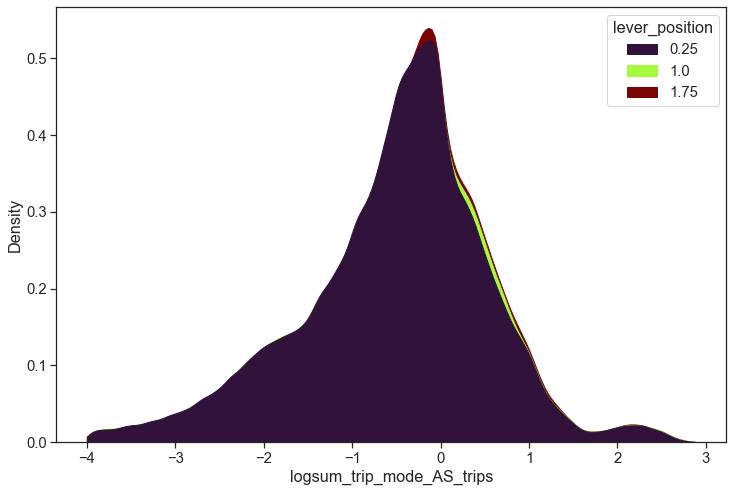

In [12]:
# Set figure size for the notebook
plt.rcParams["figure.figsize"]=12,8
sns.kdeplot(data=mand_rh_flsz_cutoff, x="logsum_trip_mode_AS_trips", hue="lever_position", cut=0, fill=True, common_norm=False, alpha=1, palette = "turbo")
plt.show()

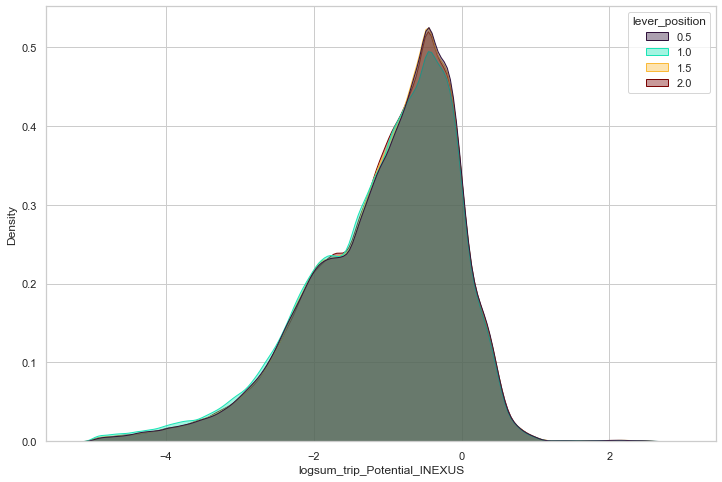

In [134]:
# Set figure size for the notebook
plt.rcParams["figure.figsize"]=12,8
# With transparency
sns.kdeplot(data=mand, x="logsum_trip_Potential_INEXUS", hue="lever_position", fill=True, common_norm=False, alpha=0.4, palette = "turbo")
plt.show()

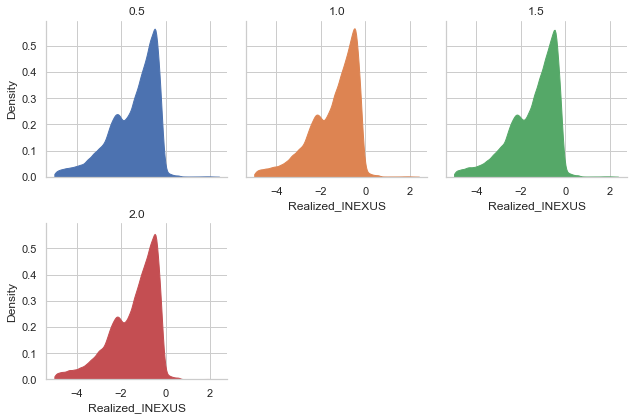

In [38]:
# set seaborn whitegrid theme
sns.set(style="whitegrid")

# using small multiple
# create a grid 
g = sns.FacetGrid(mand, col='lever_position', hue='lever_position', col_wrap=3)

# draw density plots
g = g.map(sns.kdeplot,"Realized_INEXUS", cut=0, fill=True, common_norm=False, alpha=1, legend=False)

# control the title of each facet
g = g.set_titles("{col_name}")

# show the graph
plt.show()

C:\Users\nazanin\.conda\envs\geo_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Realized_INEXUS', ylabel='Density'>

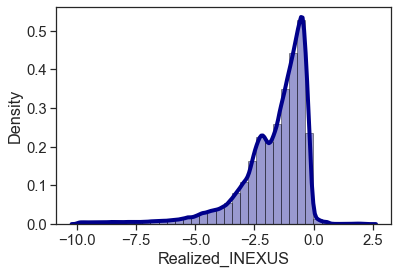

In [32]:
sns.distplot(mand['Realized_INEXUS'], hist=True, kde=True,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [52]:
# List of five airlines to plot
scenarios = ["1stQ", '2ndQ', '3rdQ', '4thQ']

# Iterate through the five airlines
for scenario in scenarios:
    # Subset to the airline
    subsets = mand_rh_flsz_cutoff[mand_rh_flsz_cutoff['income_quartiles'] == scenario]
    
    # Draw the density plot
    sns.distplot(subsets['logsum_trip_mode_AS_trips'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = scenario)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Income Quntiles')
plt.xlabel('Potential_INEXUS')
plt.ylabel('Density')

NameError: name 'mand_rh_flsz_cutoff_r' is not defined

In [ ]:
# List of five airlines to plot
scenarios = [0.25, 1.0, 1.75]

# Iterate through the five airlines
for scenario in scenarios:
    # Subset to the airline
    subsets = mand_rh_flsz_cutoff[mand_rh_flsz_cutoff['lever_position'] == scenario]
    
    # Draw the density plot
    sns.distplot(subsets['logsum_trip_mode_AS_trips'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = scenario)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Scenario Lever Position')
plt.title('Ridehail Fleet Size Scenarios vs. Baseline')
plt.xlabel('Potential_INEXUS')
plt.ylabel('Density')

In [89]:
# List of five airlines to plot
scenarios = [0.5, 1.0, 1.5, 2.0]

# Iterate through the five airlines
for scenario in scenarios:
    # Subset to the airline
    subsets = mand[mand['lever_position'] == scenario]
    
    # Draw the density plot
    sns.distplot(subsets['logsum_trip_Potential_INEXUS'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = scenario)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Scenario')
plt.title('Transit Frequency Scenarios vs. Baseline')
plt.xlabel('Realized_INEXUS')
plt.ylabel('Density')

TypeError: distplot() got an unexpected keyword argument 'palette'

C:\Users\nazanin\.conda\envs\geo_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='logsum_trip_Potential_INEXUS', ylabel='Density'>

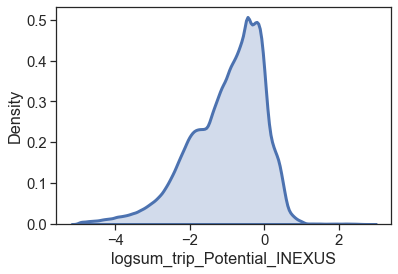

In [85]:
sns.distplot(mand['logsum_trip_Potential_INEXUS'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},
                 label = scenario)

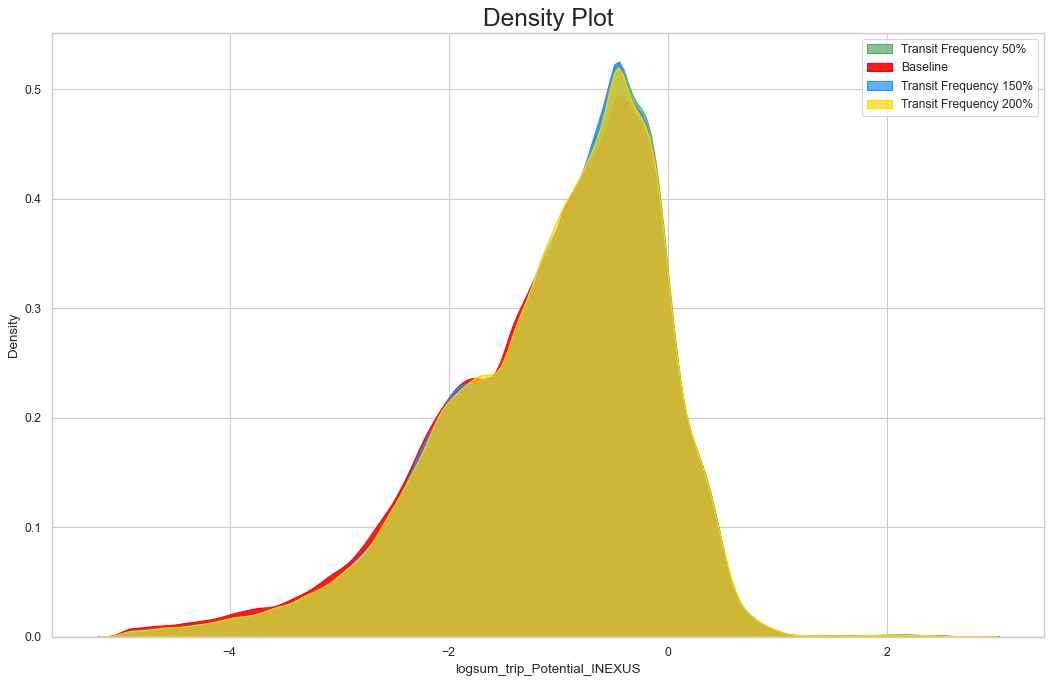

In [68]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(mand.loc[mand['lever_position'] == 0.5, "logsum_trip_Potential_INEXUS"], shade=True, color="g", label="Transit Frequency 50%", alpha=.7)
sns.kdeplot(mand.loc[mand['lever_position'] == 1.0, "logsum_trip_Potential_INEXUS"], shade=True, color="red", label="Baseline", alpha=.9)
sns.kdeplot(mand.loc[mand['lever_position'] == 1.5, "logsum_trip_Potential_INEXUS"], shade=True, color="dodgerblue", label="Transit Frequency 150%", alpha=.7)
sns.kdeplot(mand.loc[mand['lever_position'] == 2.0, "logsum_trip_Potential_INEXUS"], shade=True, color="gold", label="Transit Frequency 200%", alpha=.7)

# Decoration
plt.title('Density Plot', fontsize=22)
plt.legend()
plt.show()

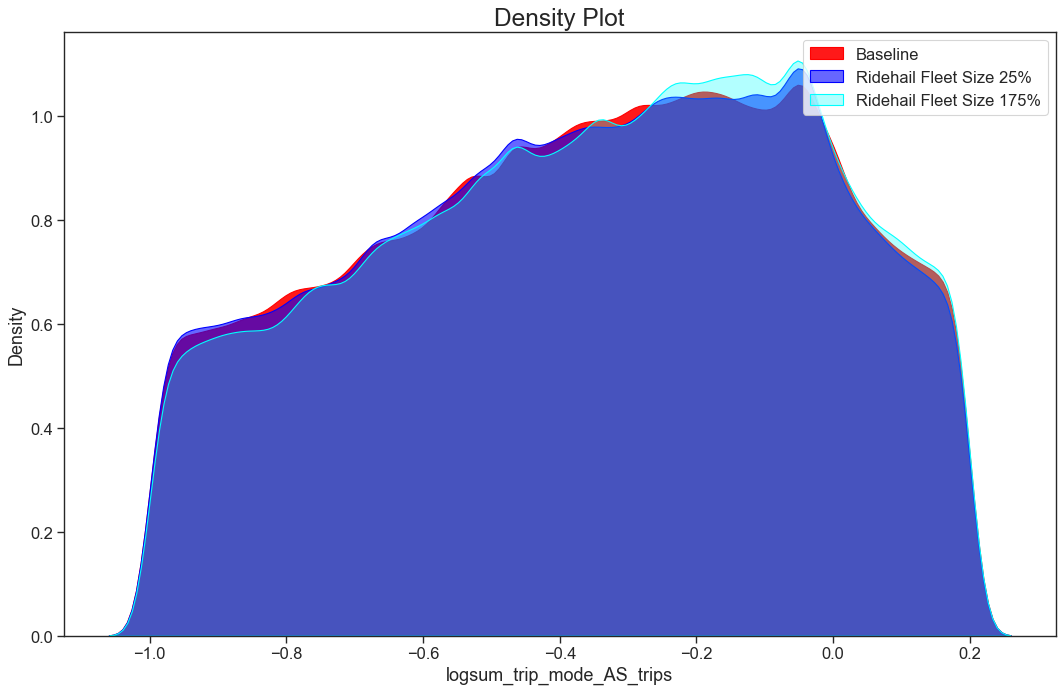

In [40]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(mand_rh_flsz_cutoff.loc[mand_rh_flsz_cutoff['lever_position'] == 1.0, "logsum_trip_mode_AS_trips"], shade=True, color="red", label="Baseline", alpha=.9)
sns.kdeplot(mand_rh_flsz_cutoff.loc[mand_rh_flsz_cutoff['lever_position'] == 0.25, "logsum_trip_mode_AS_trips"], shade=True, color="blue", label="Ridehail Fleet Size 25%", alpha=.6)
sns.kdeplot(mand_rh_flsz_cutoff.loc[mand_rh_flsz_cutoff['lever_position'] == 1.75, "logsum_trip_mode_AS_trips"], shade=True, color="cyan", label="Ridehail Fleet Size 175%", alpha=0.3)

# Decoration
plt.title('Density Plot', fontsize=22)
plt.legend()
plt.show()

In [42]:
mand_rh_flsz_cutoff.income_quartiles.unique()

array(['4thQ', '2ndQ', '3rdQ', '1stQ', nan], dtype=object)

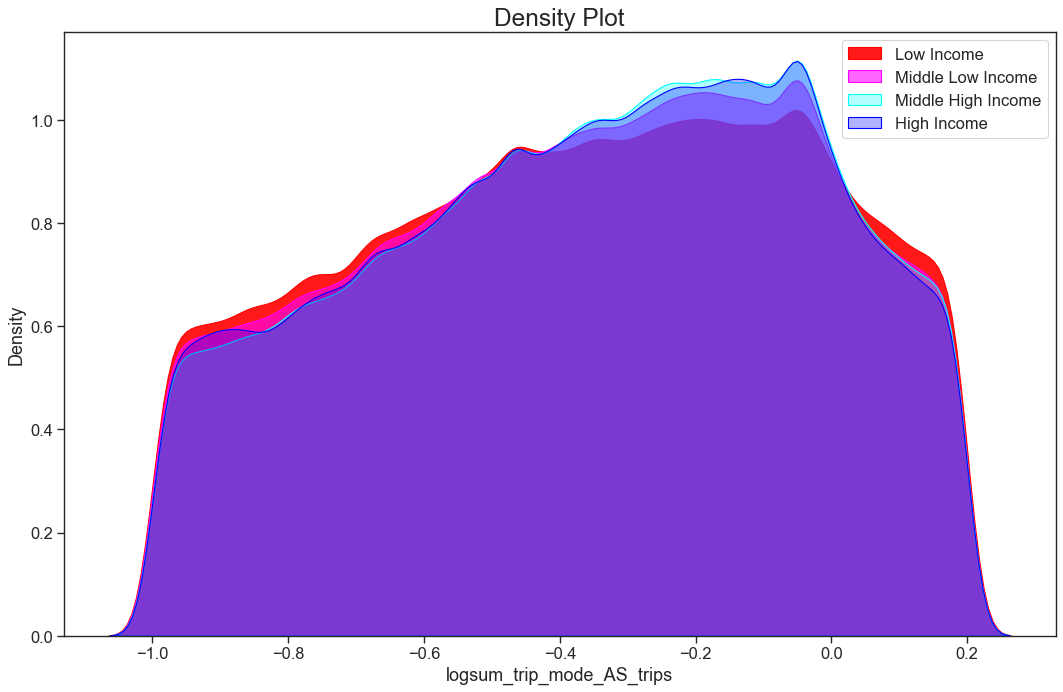

In [48]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(mand_rh_flsz_cutoff.loc[mand_rh_flsz_cutoff['income_quartiles'] == "1stQ", "logsum_trip_mode_AS_trips"], shade=True, color="red", label="Low Income", alpha=.9)
sns.kdeplot(mand_rh_flsz_cutoff.loc[mand_rh_flsz_cutoff['income_quartiles'] == '2ndQ', "logsum_trip_mode_AS_trips"], shade=True, color="magenta", label="Middle Low Income", alpha=.6)
sns.kdeplot(mand_rh_flsz_cutoff.loc[mand_rh_flsz_cutoff['income_quartiles'] == '3rdQ', "logsum_trip_mode_AS_trips"], shade=True, color="cyan", label="Middle High Income", alpha=0.3)
sns.kdeplot(mand_rh_flsz_cutoff.loc[mand_rh_flsz_cutoff['income_quartiles'] == '4thQ', "logsum_trip_mode_AS_trips"], shade=True, color="blue", label="High Income", alpha=0.3)

# Decoration
plt.title('Density Plot', fontsize=22)
plt.legend()
plt.show()

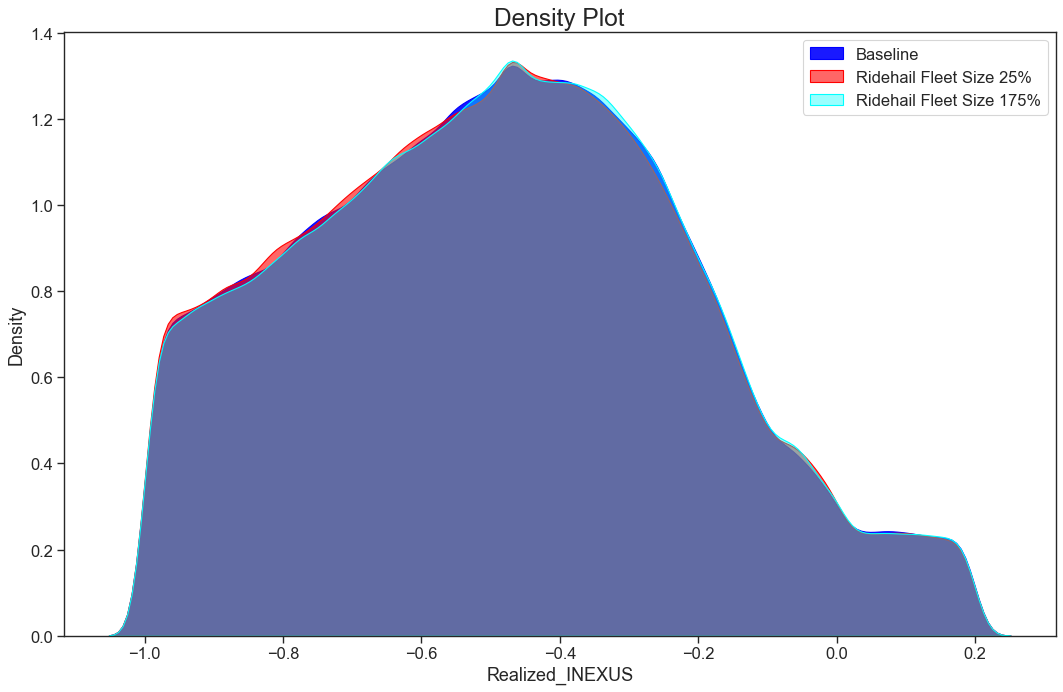

In [38]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(mand_rh_flsz_cutoff.loc[mand_rh_flsz_cutoff['lever_position'] == 1.0, "Realized_INEXUS"], shade=True, color="blue", label="Baseline", alpha=.9)
sns.kdeplot(mand_rh_flsz_cutoff.loc[mand_rh_flsz_cutoff['lever_position'] == 0.25, "Realized_INEXUS"], shade=True, color="red", label="Ridehail Fleet Size 25%", alpha=.6)
sns.kdeplot(mand_rh_flsz_cutoff.loc[mand_rh_flsz_cutoff['lever_position'] == 1.75, "Realized_INEXUS"], shade=True, color="cyan", label="Ridehail Fleet Size 175%", alpha=0.4)

# Decoration
plt.title('Density Plot', fontsize=22)
plt.legend()
plt.show()

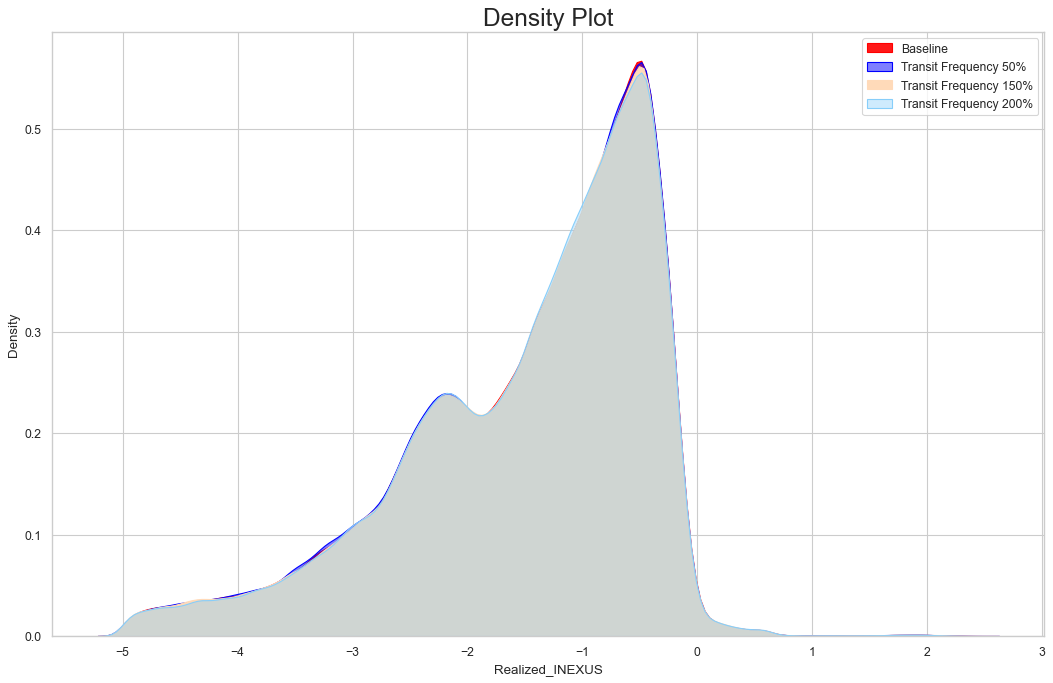

In [90]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(mand.loc[mand['lever_position'] == 1.0, "Realized_INEXUS"], shade=True, color="red", label="Baseline", alpha=.9)
sns.kdeplot(mand.loc[mand['lever_position'] == 0.5, "Realized_INEXUS"], shade=True, color="blue", label="Transit Frequency 50%", alpha=.5)
sns.kdeplot(mand.loc[mand['lever_position'] == 1.5, "Realized_INEXUS"], shade=True, color="peachpuff", label="Transit Frequency 150%", alpha=1)
sns.kdeplot(mand.loc[mand['lever_position'] == 2.0, "Realized_INEXUS"], shade=True, color="lightskyblue", label="Transit Frequency 200%", alpha=.4)

# Decoration
plt.title('Density Plot', fontsize=22)
plt.legend()
plt.show()

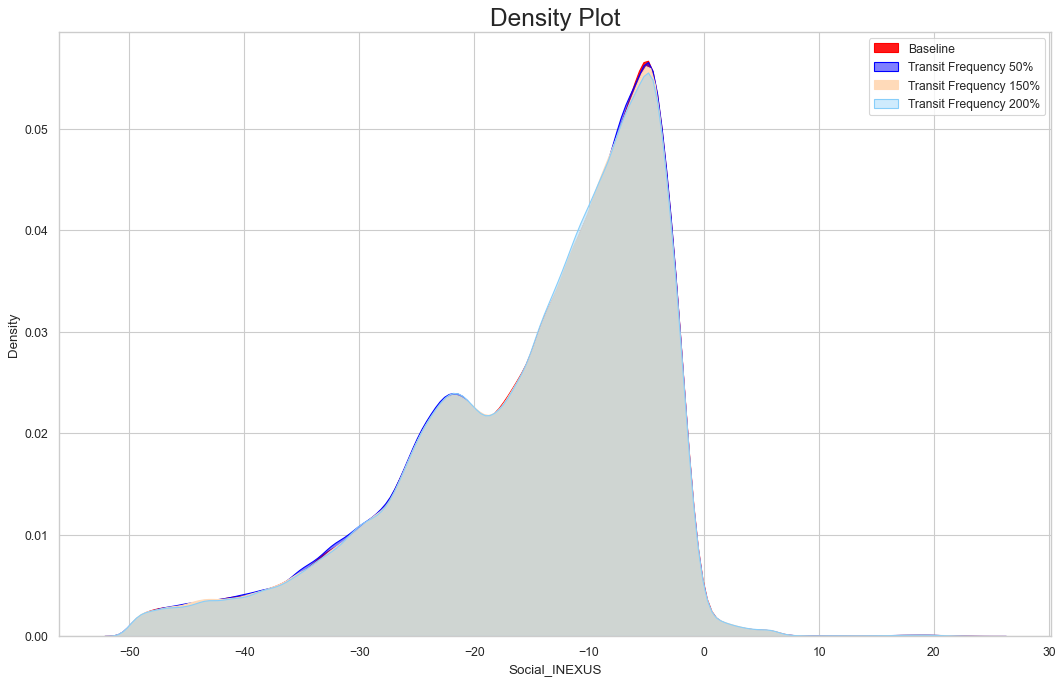

In [92]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(mand.loc[mand['lever_position'] == 1.0, "Social_INEXUS"], shade=True, color="red", label="Baseline", alpha=.9)
sns.kdeplot(mand.loc[mand['lever_position'] == 0.5, "Social_INEXUS"], shade=True, color="blue", label="Transit Frequency 50%", alpha=.5)
sns.kdeplot(mand.loc[mand['lever_position'] == 1.5, "Social_INEXUS"], shade=True, color="peachpuff", label="Transit Frequency 150%", alpha=1)
sns.kdeplot(mand.loc[mand['lever_position'] == 2.0, "Social_INEXUS"], shade=True, color="lightskyblue", label="Transit Frequency 200%", alpha=.4)

# Decoration
plt.title('Density Plot', fontsize=22)
plt.legend()
plt.show()

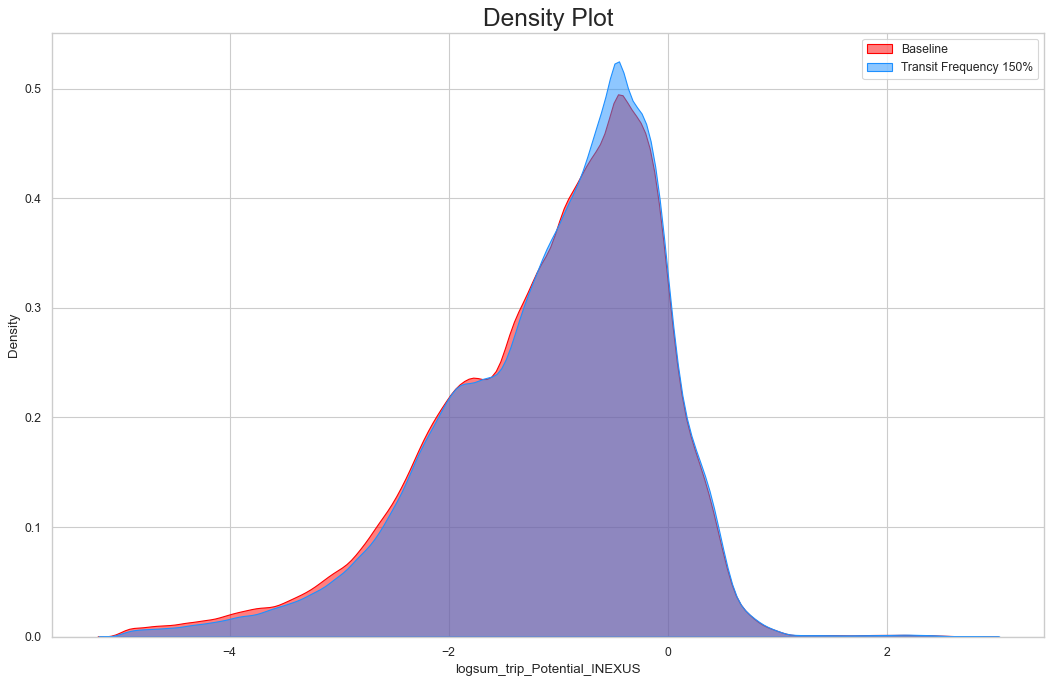

In [62]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(mand.loc[mand['lever_position'] == 1.0, "logsum_trip_Potential_INEXUS"], shade=True, color="red", label="Baseline", alpha=.5)
sns.kdeplot(mand.loc[mand['lever_position'] == 1.5, "logsum_trip_Potential_INEXUS"], shade=True, color="dodgerblue", label="Transit Frequency 150%", alpha=.5)
# Decoration
plt.title('Density Plot', fontsize=22)
plt.legend()
plt.show()

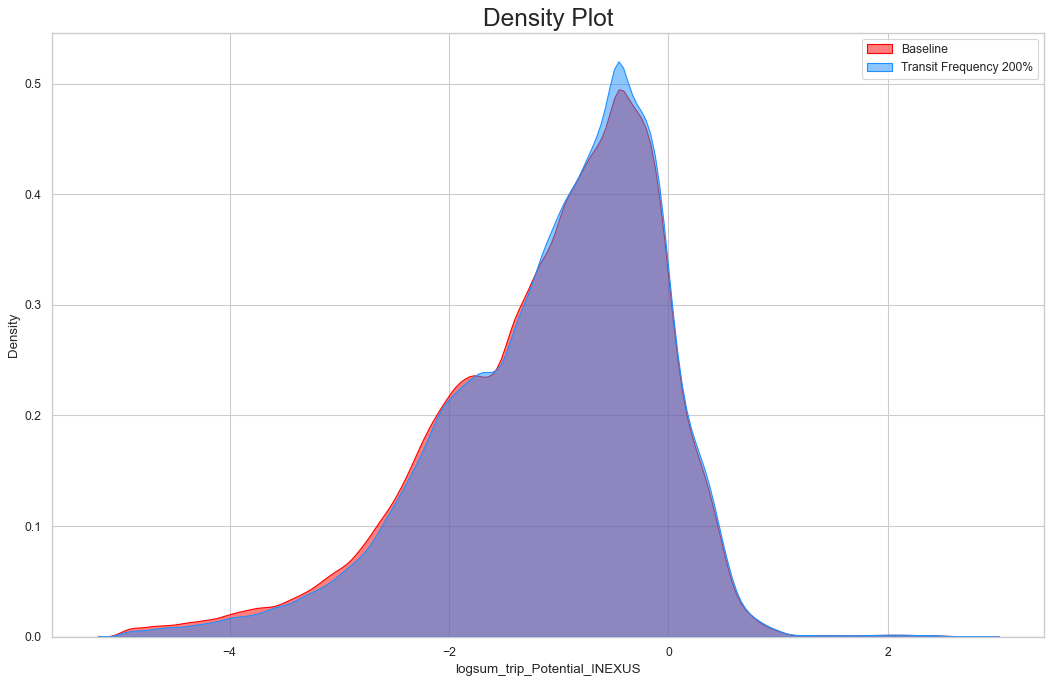

In [63]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(mand.loc[mand['lever_position'] == 1.0, "logsum_trip_Potential_INEXUS"], shade=True, color="red", label="Baseline", alpha=.5)
sns.kdeplot(mand.loc[mand['lever_position'] == 2.0, "logsum_trip_Potential_INEXUS"], shade=True, color="dodgerblue", label="Transit Frequency 200%", alpha=.5)
# Decoration
plt.title('Density Plot', fontsize=22)
plt.legend()
plt.show()